In [2]:
# Combine spec int 2006 and 2017, filter TPC-H CPUs.

In [3]:
!pip install pandas duckdb matplotlib seaborn

import pandas as pd
import duckdb
import os
import matplotlib.pyplot as plt
import seaborn as sns

key_vendor = "Hardware Vendor\t"
key_system = "System"
key_processor = "Processor"

file_combined_path = '../spec_rate/spec-rint2006-2017.csv'

# Avoid data cropping when using display()
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

if False and os.path.exists(file_combined_path):
    df = pd.read_csv(file_combined_path)
else:
    # Load data from the first CSV file
    file1_path = '../spec_rate/rint2006-results-20241114-093618.csv'
    if os.path.exists(file1_path):
        data1 = pd.read_csv(file1_path)
    else:
        raise FileNotFoundError(f"The file {file1_path} does not exist.")

    # Load data from the second CSV file
    file2_path = '../spec_rate/rint2017-results-20241114-093725.csv'
    if os.path.exists(file2_path):
        data2 = pd.read_csv(file2_path)
    else:
        raise FileNotFoundError(f"The file {file2_path} does not exist.")

    # Add a column to each dataframe to label the source
    data1['Source'] = 'rint2006'
    data2['Source'] = 'rint2017'
    # 2006 columns: 'Result' 'Baseline'
    # 2017 columns: 'Result' 'Baseline'
    data1['perf'] = data1['Result']
    data2['perf'] = data2['Result'] * 9
    # data2["perf"] = data2["Result"]

    # Concatenate the dataframes
    df = pd.concat([data1, data2], ignore_index=True)
    # df = data2
    df = df[df["HW Avail"].notna()]
    df["hw_avail_year"] = df["HW Avail"].str.split('-').str[1].astype(int)
    df["perf_per_chip"] = df["perf"] / df["# Chips"]
    # Filter out 0 values
    df = df[df["perf"] != 0]
    # df["baseline_per_core"] = df["Baseline"] / df["# Cores"]
    # Use below line to write data
    df.to_csv(file_combined_path, index=False)
display(df.columns)
display(df.index)
    
    
# con = duckdb.connect("../spec.db")
# con.sql("DROP TABLE IF EXISTS spec")
# con.sql("CREATE TABLE spec AS SELECT * FROM df")
# con.close()



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


Index(['Benchmark', 'Hardware Vendor\t', 'System', '# Cores', '# Chips',
       '# Cores Per Chip', '# Threads Per Core', 'Processor', 'Processor MHz',
       'Processor Characteristics', 'CPU(s) Orderable', 'Auto Parallelization',
       'Base Pointer Size', 'Peak Pointer Size', '1st Level Cache',
       '2nd Level Cache', '3rd Level Cache', 'Other Cache', 'Memory',
       'Operating System', 'File System', 'Compiler', 'HW Avail', 'SW Avail',
       'Base Copies', 'Result', 'Baseline', '400 Peak', '400 Base', '401 Peak',
       '401 Base', '403 Peak', '403 Base', '429 Peak', '429 Base', '445 Peak',
       '445 Base', '456 Peak', '456 Base', '458 Peak', '458 Base', '462 Peak',
       '462 Base', '464 Peak', '464 Base', '471 Peak', '471 Base', '473 Peak',
       '473 Base', '483 Peak', '483 Base', 'License', 'Tested By',
       'Test Sponsor', 'Test Date', 'Published', 'Updated ', 'Disclosure',
       'Disclosures', 'Source', 'perf', '# Enabled Threads Per Core',
       'Parallel', 'Sto

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       26679, 26680, 26681, 26682, 26683, 26684, 26685, 26686, 26688, 26834],
      dtype='int64', length=21853)

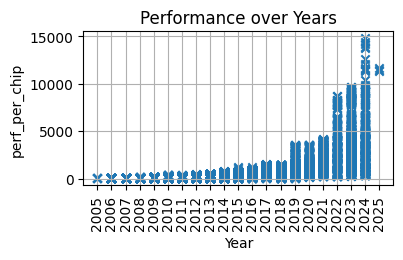

In [4]:
plt.close('all')
# display(df)
plt.figure(figsize=(4, 2))
# y_val = 'Baseline'
y_val = 'perf_per_chip'
#y_val = 'baseline_per_core'
plt.scatter(
    df['hw_avail_year'],
    df[y_val],
    marker='x')
plt.xlabel('Year')
plt.ylabel(y_val)
plt.title('Performance over Years')
plt.xticks(ticks=df['hw_avail_year'].unique(), rotation=90)
plt.grid(True)
plt.show()
plt.close()

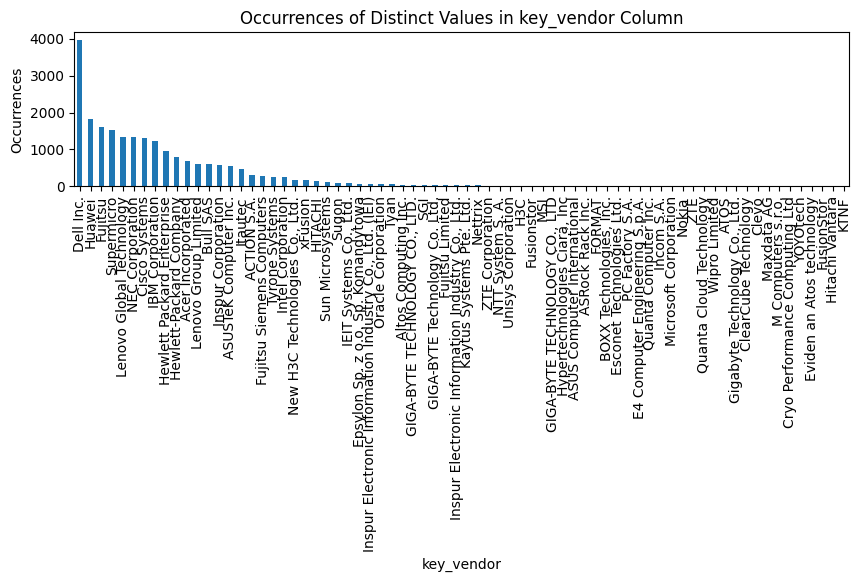

In [5]:
# Count the occurrences of each distinct value in the "key_vendor" column
value_counts = df[key_vendor].value_counts()

# Create a histogram
plt.figure(figsize=(10, 2))
value_counts.plot(kind='bar')
plt.title('Occurrences of Distinct Values in key_vendor Column')
plt.xlabel('key_vendor')
plt.ylabel('Occurrences')
plt.xticks(rotation=90)
plt.show()

In [8]:
# Dynamic approach
# df_intel_tpc = pd.read_csv("../tpc_xeon.csv")
# df_intel_tpc["model"] = df_intel_tpc["model"].str.strip()
# df_intel_tpc = df_intel_tpc[df_intel_tpc["model"] != "Intel Xeon"]
# model_selection = df_intel_tpc["model"].unique()

columns = ["Benchmark", key_processor,"Processor MHz", "perf_per_chip"] 

# Removed Xeon Processor
# TODO Questions
# - What Xeon (v1) Processor was used?

# Static approach
# Search patterns manually relaxed (e.g., removed last latter )
model_selection = ['Gallatin', '5160', 'X5355',
 '7040', '7041', '7140', '7140',
 '7150', 'E5320', 'E5345',
 'X5365', 'X5460', 'X7350',
 'E5420', 'X5440', 'X7460',
 'E5520', 'X5570', 'X5680',
 'X5650', 'X7560', 'X5690',
 '8870', '2690', '4650',
 '2680', '8890', '8891',
 '2690', '2699', '2680',
 '4890', '2670', '2699',
 '8180', '2630',
 '4114', '6150', '6148',
 '8163', '4110',
 '4210', '6258',
 '6354', '8255',
 '4410']

# model_selection = ['AMD EPYC 7502P', 'AMD EPYC 9334']

pattern = '|'.join(model_selection)

# All columns:
# ['Benchmark', 'Hardware Vendor\t', 'System', '# Cores', '# Chips',
#        '# Cores Per Chip', '# Threads Per Core', 'Processor ', 'Processor MHz',
#        'Processor Characteristics', 'CPU(s) Orderable', 'Auto Parallelization',
#        'Base Pointer Size', 'Peak Pointer Size', '1st Level Cache',
#        '2nd Level Cache', '3rd Level Cache', 'Other Cache', 'Memory',
#        'Operating System', 'File System', 'Compiler', 'HW Avail', 'SW Avail',
#        'Result', 'Baseline', '400 Peak', '400 Base', '401 Peak', '401 Base',
#        '403 Peak', '403 Base', '429 Peak', '429 Base', '445 Peak', '445 Base',
#        '456 Peak', '456 Base', '458 Peak', '458 Base', '462 Peak', '462 Base',
#        '464 Peak', '464 Base', '471 Peak', '471 Base', '473 Peak', '473 Base',
#        '483 Peak', '483 Base', 'License', 'Tested By', 'Test Sponsor',
#        'Test Date', 'Published', 'Updated ', 'Disclosure', 'Disclosures',
#        'Source', 'perf', '# Enabled Threads Per Core', 'Parallel', 'Storage',
#        'Energy Peak Result', 'Energy Base Result', '600 Peak', '600 Base',
#        '602 Peak', '602 Base', '605 Peak', '605 Base', '620 Peak', '620 Base',
#        '623 Peak', '623 Base', '625 Peak', '625 Base', '631 Peak', '631 Base',
#        '641 Peak', '641 Base', '648 Peak', '648 Base', '657 Peak', '657 Base',
#        'hw_avail_year', 'perf_per_chip']
# columns = ['# Cores', '# Chips', '# Cores Per Chip', '# Threads Per Core', 'Processor ', 'Processor MHz',
#         'Processor Characteristics', 'CPU(s) Orderable',
#         'Result', 'Baseline', 'perf',
#         'hw_avail_year', 'perf_per_chip']

# display(df_intel_tpc)
print(df.columns)
df_filtered = df[(df[key_processor].str.contains(pattern, case=False))]# and (df["# Chips"] == 1)]
print(len(df_filtered))
df_filtered = df_filtered.sort_values(by=key_processor, ascending=True)
# # df_filtered.to_csv("spec-AMD-example-data.csv", header=True)
sources = df_filtered["Source"].unique()
df_filtered[columns].to_csv("../spec_rate/spec-{}-tpc-cpus.csv".format("".join(sources)),header=True)

# # cpu_id_columns = ['# Cores Per Chip', 'Processor ', 'Processor MHz']
# # df_cpus = df_filtered[cpu_id_columns]
# # Notes
# # - "Gallatin" does not exist in spec data set

Index(['Benchmark', 'Hardware Vendor\t', 'System', '# Cores', '# Chips',
       '# Cores Per Chip', '# Threads Per Core', 'Processor', 'Processor MHz',
       'Processor Characteristics', 'CPU(s) Orderable', 'Auto Parallelization',
       'Base Pointer Size', 'Peak Pointer Size', '1st Level Cache',
       '2nd Level Cache', '3rd Level Cache', 'Other Cache', 'Memory',
       'Operating System', 'File System', 'Compiler', 'HW Avail', 'SW Avail',
       'Base Copies', 'Result', 'Baseline', '400 Peak', '400 Base', '401 Peak',
       '401 Base', '403 Peak', '403 Base', '429 Peak', '429 Base', '445 Peak',
       '445 Base', '456 Peak', '456 Base', '458 Peak', '458 Base', '462 Peak',
       '462 Base', '464 Peak', '464 Base', '471 Peak', '471 Base', '473 Peak',
       '473 Base', '483 Peak', '483 Base', 'License', 'Tested By',
       'Test Sponsor', 'Test Date', 'Published', 'Updated ', 'Disclosure',
       'Disclosures', 'Source', 'perf', '# Enabled Threads Per Core',
       'Parallel', 'Sto

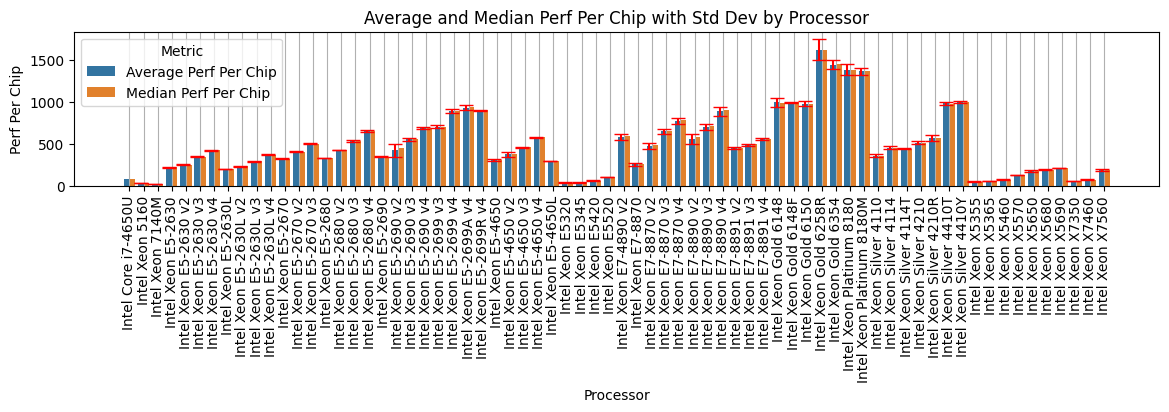

In [ ]:
# Group by key_processor and aggregate the metric "perf_per_chip"
grouped = df_filtered.groupby(key_processor)['perf_per_chip'].agg(['mean', 'std', 'median']).reset_index()

# Renaming columns for better understanding
grouped.columns = ['Processor', 'Average Perf Per Chip', 'Std Dev Perf Per Chip', 'Median Perf Per Chip']

# Melting the DataFrame for easier plotting
grouped_melted = grouped.melt(id_vars=['Processor', 'Std Dev Perf Per Chip'], 
                              value_vars=['Average Perf Per Chip', 'Median Perf Per Chip'],
                              var_name='Metric', value_name='Perf Per Chip')

# Plotting using seaborn
plt.figure(figsize=(14, 2))
bar_plot = sns.barplot(x='Processor', y='Perf Per Chip', hue='Metric', data=grouped_melted, errorbar=None)
for i in range(len(grouped)):
    bar_plot.errorbar(x=i-0.2, y=grouped.iloc[i]['Average Perf Per Chip'],
                      yerr=grouped.iloc[i]['Std Dev Perf Per Chip'], fmt='none', c='red', capsize=5)

plt.xlabel('Processor')
plt.ylabel('Perf Per Chip')
plt.title('Average and Median Perf Per Chip with Std Dev by Processor')
plt.xticks(rotation=90)
plt.legend(title='Metric')
plt.grid(axis='x')  # Add this line to enable x-axis grid lines
plt.show()


In [ ]:
median_spec_perf = grouped_melted[grouped_melted["Metric"].str.contains("Median")]
median_spec_perf = median_spec_perf.drop(columns=["Std Dev Perf Per Chip", "Metric"])
median_spec_perf.rename(columns={"Perf Per Chip": "median_spec_int_perf"}, inplace=True)

median_spec_perf.to_csv("../spec_rate/spec-median-{}-tpc-cpus.csv".format("".join(sources)),header=True)
display(median_spec_perf)

,Processor,median_spec_int_perf
70,Intel Core i7-4650U,79.500
71,Intel Xeon 5160,31.200
72,Intel Xeon 7140M,20.775
73,Intel Xeon E5-2630,218.000
74,Intel Xeon E5-2630 v2,251.500
75,Intel Xeon E5-2630 v3,346.000
76,Intel Xeon E5-2630 v4,423.250
77,Intel Xeon E5-2630L,196.000
78,Intel Xeon E5-2630L v2,229.750
79,Intel Xeon E5-2630L v3,290.500


In [ ]:
# df = pd.read_csv('../tpc_xeon_perf_spec2006-2017combined.csv')

# merged_df = pd.merge(df, median_spec_perf, left_on='model', right_on='Processor', how='left')

# # Display the merged DataFrame
# print(merged_df)
